In [1]:
# download functions for course
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-09-21 02:47:13--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-09-21 02:47:13 (89.4 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [2]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, walk_through_dir, unzip_data

In [3]:
#download data for project
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data('10_food_classes_10_percent.zip')

--2022-09-21 02:47:16--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.128, 74.125.20.128, 108.177.98.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  73.6MB/s    in 2.2s    

2022-09-21 02:47:19 (73.6 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [4]:
#review directory of data
walk_through_dir('10_food_classes_10_percent')

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ch

In [5]:
train_dir = '10_food_classes_10_percent/train'
test_dir = '10_food_classes_10_percent/test'

In [6]:
import tensorflow as tf

IMG_SIZE = (224,224)
BATCH_SIZE = 32

#prep train and test sets
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                             image_size=IMG_SIZE,
                                                                             label_mode='categorical',
                                                                             batch_size=BATCH_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                image_size=IMG_SIZE,
                                                                label_mode='categorical',
                                                                batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [7]:
#review classes in dataset 
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

**Test the base model (EfficientNet B0)**

In [8]:
#Model 0

#create base model with our own output layer
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

#freeze base model
base_model.trainable = False

#create inputs into our model
inputs = tf.keras.layers.Input(shape=(224,224,3), name='input_layer')

#normalize inputs if needed 
#x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

#pass inputs to base model
x = base_model(inputs)
print(f'Shape after passing inputs through base model: {x.shape}')
#average pool the putputs of the base
x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)
print(f'Shape after GlobalAveragePooling2D: {x.shape}')

#create the output layer
outputs = tf.keras.layers.Dense(10, activation='softmax', name='output_layer')(x)

#combine the inputs with the outputs
model_0 = tf.keras.Model(inputs, outputs)

#compile
model_0.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])
#fit
history_0 = model_0.fit(train_data_10_percent,
                             epochs=5,
                             validation_data=test_data,
                             steps_per_epoch=len(train_data_10_percent),
                             validation_steps=int(0.25 *len(test_data)),
                            callbacks=[create_tensorboard_callback(dir_name='transfer_learning', experiment_name='model_0')])

16719872/16705208 [==============================] - 0s 0us/step
Shape after passing inputs through base model: (None, 7, 7, 1280)
Shape after GlobalAveragePooling2D: (None, 1280)
Saving TensorBoard log files to: transfer_learning/model_0/20220921-024729
Epoch 1/5
24/24 [==============================] - 22s 221ms/step - loss: 1.8333 - accuracy: 0.4493 - val_loss: 1.2976 - val_accuracy: 0.7155
Epoch 2/5
24/24 [==============================] - 5s 184ms/step - loss: 1.1148 - accuracy: 0.7680 - val_loss: 0.9168 - val_accuracy: 0.7944
Epoch 3/5
24/24 [==============================] - 4s 152ms/step - loss: 0.8333 - accuracy: 0.8133 - val_loss: 0.7780 - val_accuracy: 0.8109
Epoch 4/5
24/24 [==============================] - 4s 149ms/step - loss: 0.6839 - accuracy: 0.8507 - val_loss: 0.6617 - val_accuracy: 0.8421
Epoch 5/5
24/24 [==============================] - 6s 213ms/step - loss: 0.5858 - accuracy: 0.8640 - val_loss: 0.6166 - val_accuracy: 0.8273


In [9]:
#evaluate on full test data
model_0.evaluate(test_data)

79/79 [==============================] - 6s 76ms/step - loss: 0.5999 - accuracy: 0.8408


[0.5999376773834229, 0.8407999873161316]

**Review the layers and structure of the base model**

In [10]:
#check the layers in our base model
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_1
1 rescaling
2 normalization
3 stem_conv_pad
4 stem_conv
5 stem_bn
6 stem_activation
7 block1a_dwconv
8 block1a_bn
9 block1a_activation
10 block1a_se_squeeze
11 block1a_se_reshape
12 block1a_se_reduce
13 block1a_se_expand
14 block1a_se_excite
15 block1a_project_conv
16 block1a_project_bn
17 block2a_expand_conv
18 block2a_expand_bn
19 block2a_expand_activation
20 block2a_dwconv_pad
21 block2a_dwconv
22 block2a_bn
23 block2a_activation
24 block2a_se_squeeze
25 block2a_se_reshape
26 block2a_se_reduce
27 block2a_se_expand
28 block2a_se_excite
29 block2a_project_conv
30 block2a_project_bn
31 block2b_expand_conv
32 block2b_expand_bn
33 block2b_expand_activation
34 block2b_dwconv
35 block2b_bn
36 block2b_activation
37 block2b_se_squeeze
38 block2b_se_reshape
39 block2b_se_reduce
40 block2b_se_expand
41 block2b_se_excite
42 block2b_project_conv
43 block2b_project_bn
44 block2b_drop
45 block2b_add
46 block3a_expand_conv
47 block3a_expand_bn
48 block3a_expand_activation
49 block3a_dwcon

In [11]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

In [12]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


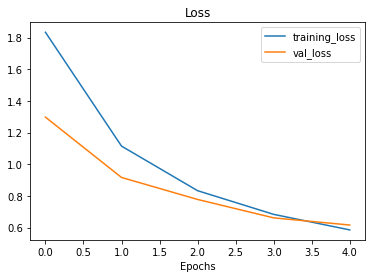

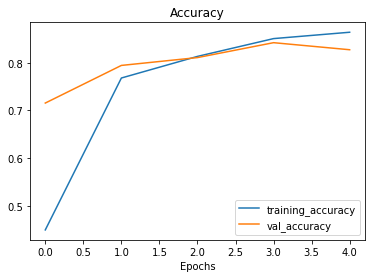

In [13]:
plot_loss_curves(history_0)

**Model 0 trained on 10% of the data set with training only allowed on the output layer and it still performed very well**

**Now we will create several different models:**

Model_1: feature extraction transfer learning on 1% of data with augmentation

Model_2: feature extraction transfer learning on 10% with augmentation

Model_3: fine-tuning transfer learning on 10% with augmentation

Model_4: fine-tuning transfer learning on 100% with augmentation

In [14]:
#download 1% of data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

unzip_data('10_food_classes_1_percent.zip')

--2022-09-21 02:48:29--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.117.128, 173.194.202.128, 173.194.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.117.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   157MB/s    in 0.8s    

2022-09-21 02:48:30 (157 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [15]:
train_dir_1_percent = '10_food_classes_1_percent/train'
test_dir = '10_food_classes_1_percent/test'

walk_through_dir('10_food_classes_1_percent')

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_curry'

In [16]:
#process data
IMG_SIZE = (224,224)
BATCH_SIZE = 32
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir_1_percent,
                                                                             image_size=IMG_SIZE,
                                                                             label_mode='categorical',
                                                                             batch_size=BATCH_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                image_size=IMG_SIZE,
                                                                label_mode='categorical',
                                                                batch_size=BATCH_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [17]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [18]:
#augment data
data_augmentation = keras.Sequential([
    preprocessing.RandomFlip('horizontal'),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    #preprocessing.Rescale(1./255) # not needed for EfficentNet

], name='data_augmentation')

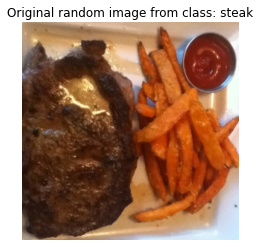

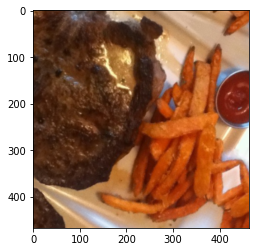

In [19]:
#show random example of image and augmented image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data_1_percent.class_names)
target_dir = '10_food_classes_1_percent/train/' + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + '/' + random_image

img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f'Original random image from class: {target_class}')
plt.axis(False);

augmented_img = data_augmentation(tf.expand_dims(img, axis=0), training=True)
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.)


In [20]:
#create model 1 (EfficientNet B0 with 1% of data and augmentation)
input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=input_shape, name = 'input_layer')
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name='global_average_pooling')(x)

outputs = layers.Dense(10, activation='softmax', name='output_layer')(x)

model_1 = keras.Model(inputs, outputs)

model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_1 = model_1.fit(train_data_1_percent,
                        epochs=5,
                        steps_per_epoch=len(train_data_1_percent),
                        validation_data=test_data,
                        validation_steps=int(0.25*len(test_data)),
                        callbacks=[create_tensorboard_callback(dir_name='transfer_learning',
                                                               experiment_name='model_1')])
                                                  

Saving TensorBoard log files to: transfer_learning/model_1/20220921-024835
Epoch 1/5
3/3 [==============================] - 10s 2s/step - loss: 2.4061 - accuracy: 0.1143 - val_loss: 2.3075 - val_accuracy: 0.1151
Epoch 2/5
3/3 [==============================] - 4s 2s/step - loss: 2.1888 - accuracy: 0.1714 - val_loss: 2.1747 - val_accuracy: 0.2204
Epoch 3/5
3/3 [==============================] - 3s 1s/step - loss: 2.0553 - accuracy: 0.3857 - val_loss: 2.0634 - val_accuracy: 0.3174
Epoch 4/5
3/3 [==============================] - 4s 2s/step - loss: 1.8656 - accuracy: 0.4429 - val_loss: 1.9761 - val_accuracy: 0.3947
Epoch 5/5
3/3 [==============================] - 3s 1s/step - loss: 1.6999 - accuracy: 0.5571 - val_loss: 1.8912 - val_accuracy: 0.4276


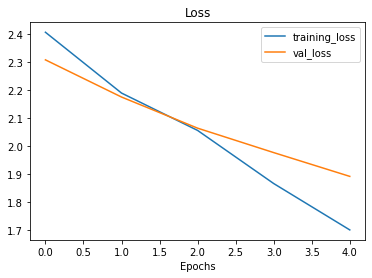

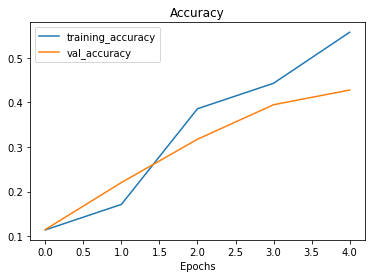

In [21]:
plot_loss_curves(history_1)

In [22]:
model_1.evaluate(test_data)

79/79 [==============================] - 6s 72ms/step - loss: 1.8851 - accuracy: 0.4384


[1.8851251602172852, 0.438400000333786]

**Summary of Model 1: Promising results for 1% of training data. We will continue with more training**

In [23]:
train_dir_10_percent = '10_food_classes_10_percent/train'
test_dir = '10_food_classes_10_percent/test'

In [24]:
IMG_SIZE=(224,224)
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                           label_mode='categorical',
                                                                           image_size=IMG_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode='categorical',
                                                                image_size=IMG_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [25]:
data_augmentation = keras.Sequential([
    preprocessing.RandomFlip('horizontal'),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    #preprocessing.Rescale(1./255) # not needed for EfficentNet

], name='data_augmentation')

In [26]:
#create model 2 (EfficientNet B0 training on 10% of augmented data)
input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=input_shape, name = 'input_layer')
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)

outputs = layers.Dense(10, activation='softmax', name='output_layer')(x)

model_2 = keras.Model(inputs, outputs)

model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])



In [27]:
#add checkpoints to model 2
checkpoint_path = 'ten_percent_model_checkpoints_weights/checkpoint.ckpt'

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 save_best_only=False,
                                                 save_freq='epoch',
                                                 verbose=1)

In [28]:
initial_epochs = 5

history_2 = model_2.fit(train_data_10_percent,
                        epochs=initial_epochs,
                        validation_data=test_data,
                        validation_steps=int(0.25*len(test_data)),
                        callbacks=[create_tensorboard_callback(dir_name='transfer_learning',
                                                               experiment_name='model_2'),
                                   checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/model_2/20220921-024911
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 2.0707 - accuracy: 0.2840
Epoch 1: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 18s 528ms/step - loss: 2.0707 - accuracy: 0.2840 - val_loss: 1.5464 - val_accuracy: 0.6234
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.4010 - accuracy: 0.6453
Epoch 2: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 11s 432ms/step - loss: 1.4010 - accuracy: 0.6453 - val_loss: 1.0701 - val_accuracy: 0.7747
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.0683 - accuracy: 0.7253
Epoch 3: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 10s 392ms/step - loss: 1.0683 - accuracy: 0.7253 - val_loss: 0.8613 - val_accuracy: 0.7895
Epoch 4/5
24/

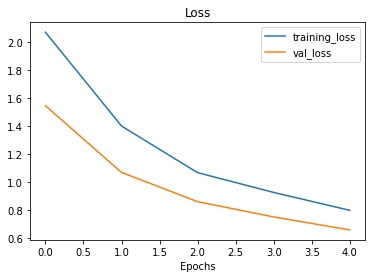

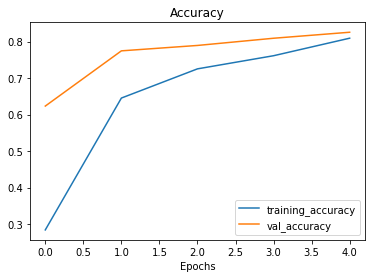

In [29]:
plot_loss_curves(history_2)

In [30]:
model_2.evaluate(test_data)

79/79 [==============================] - 6s 73ms/step - loss: 0.7044 - accuracy: 0.8108


[0.7044171094894409, 0.8108000159263611]

**The increase in training data greatly improved the model**

In [31]:
#confirming that model_2 layers are not trainable
for i , layer in enumerate(model_2.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [32]:
# change base model to make the last 10 layers trainable
base_model.trainable = True

for layer in base_model.layers[:-10]:
  layer.trainable=False

In [33]:
#compile updated base model
base_model.compile(loss='categorical_crossentropy',
                   optimizer=tf.optimizers.Adam(learning_rate=0.0001), # when fine-tuning, lower learning rate by 10X
                   metrics=['accuracy'])

In [34]:
#confirm change to some trainable layers
for layer_number, layer in enumerate(model_2.layers[2].layers):
  print(layer_number,layer.name,layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [35]:
model_3 = model_2 #model 3 is model 2 with the new base. Training will begin where model 2 left off.

history_3 = model_3.fit(train_data_10_percent,
                        validation_data=test_data,
                        epochs=10,
                        validation_steps=int(0.25*len(test_data)),
                        initial_epoch=history_2.epoch[-1], #start training from end of model 2
                        steps_per_epoch=len(train_data_10_percent),
                        callbacks=[create_tensorboard_callback(dir_name='transfer_learning',
                                                               experiment_name='model_3'),
                                   checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/model_3/20220921-025032
Epoch 5/10
24/24 [==============================] - ETA: 0s - loss: 0.7432 - accuracy: 0.7987
Epoch 5: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 9s 340ms/step - loss: 0.7432 - accuracy: 0.7987 - val_loss: 0.6257 - val_accuracy: 0.8273
Epoch 6/10
24/24 [==============================] - ETA: 0s - loss: 0.6881 - accuracy: 0.8293
Epoch 6: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 9s 366ms/step - loss: 0.6881 - accuracy: 0.8293 - val_loss: 0.5999 - val_accuracy: 0.8207
Epoch 7/10
24/24 [==============================] - ETA: 0s - loss: 0.6384 - accuracy: 0.8253
Epoch 7: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 9s 383ms/step - loss: 0.6384 - accuracy: 0.8253 - val_loss: 0.5487 - val_accuracy: 0.8355
Epoch 8/10
24

In [36]:
model_3.evaluate(test_data)

79/79 [==============================] - 6s 72ms/step - loss: 0.5517 - accuracy: 0.8268


[0.551672637462616, 0.8267999887466431]

**Model 3 (with more trainable layers) did improve the accuracy**

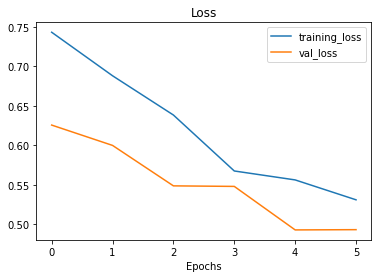

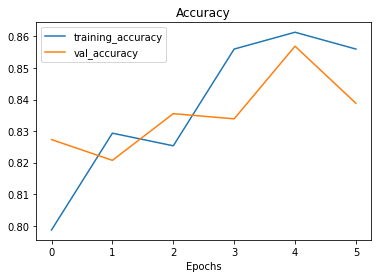

In [37]:
plot_loss_curves(history_3)

In [38]:
def compare_historys(original_history, new_history, initial_epochs=5):

  """
  Compares two model history objects.
  """

  acc = original_history.history['accuracy']
  loss = original_history.history['loss']

  val_acc = original_history.history['val_accuracy']
  val_loss = original_history.history['val_loss']

  #combine original history with new history
  total_acc = acc + new_history.history['accuracy']
  total_loss = loss + new_history.history['loss']

  total_val_acc = val_acc + new_history.history['val_accuracy']
  total_val_loss = val_loss + new_history.history['val_loss']

  #create plots
  plt.figure(figsize=(8,8))
  plt.subplot(2,1,1)
  plt.plot(total_acc, label='Training Accuracy')
  plt.plot(total_val_acc, label='Val Accuracy')
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label='Start Fine Tuning')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.figure(figsize=(8,8))
  plt.subplot(2,1,2)
  plt.plot(total_loss, label='Training Loss')
  plt.plot(total_val_loss, label='Val Loss')
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label='Start Fine Tuning')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')


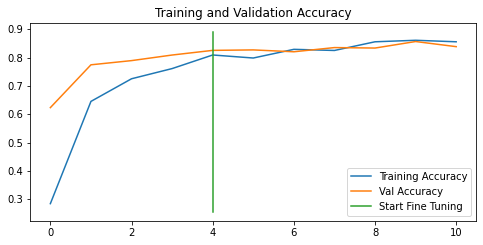

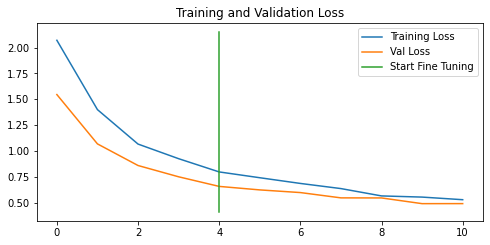

In [39]:
compare_historys(history_2, history_3)

**Model 3 improves on the accuracy and loss of model 2 in epochs 5-10.**

In [40]:
#download all data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

unzip_data('10_food_classes_all_data.zip')

--2022-09-21 02:51:35--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 74.125.135.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   141MB/s    in 3.6s    

2022-09-21 02:51:39 (136 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [41]:
train_dir_all = '10_food_classes_all_data/train'
test_dir = '10_food_classes_all_data/test'

walk_through_dir('10_food_classes_all_data')

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 

In [42]:
IMG_SIZE=(224,224)
train_data_all = tf.keras.preprocessing.image_dataset_from_directory(train_dir_all,
                                                                           label_mode='categorical',
                                                                           image_size=IMG_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode='categorical',
                                                                image_size=IMG_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [43]:
model_4 = model_3 #model 4 is the same as model 3 but it will train on all of the data. Again, training begins when model 2 ended.

history_4 = model_4.fit(train_data_all,
                        validation_data=test_data,
                        epochs=10,
                        validation_steps=int(0.25*len(test_data)),
                        initial_epoch=history_2.epoch[-1], #start training from end of model 2
                        steps_per_epoch=len(train_data_all),
                        callbacks=[create_tensorboard_callback(dir_name='transfer_learning',
                                                               experiment_name='model_4'),
                                   checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/model_4/20220921-025146
Epoch 5/10
235/235 [==============================] - ETA: 0s - loss: 0.7140 - accuracy: 0.7776
Epoch 5: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
235/235 [==============================] - 51s 212ms/step - loss: 0.7140 - accuracy: 0.7776 - val_loss: 0.4319 - val_accuracy: 0.8536
Epoch 6/10
235/235 [==============================] - ETA: 0s - loss: 0.6181 - accuracy: 0.8048
Epoch 6: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
235/235 [==============================] - 44s 184ms/step - loss: 0.6181 - accuracy: 0.8048 - val_loss: 0.3970 - val_accuracy: 0.8734
Epoch 7/10
235/235 [==============================] - ETA: 0s - loss: 0.5653 - accuracy: 0.8199
Epoch 7: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
235/235 [==============================] - 43s 180ms/step - loss: 0.5653 - accuracy: 0.8199 - val_loss: 0.3859 - val_accuracy: 0.876

In [44]:
model_4.evaluate(test_data)

79/79 [==============================] - 6s 72ms/step - loss: 0.3591 - accuracy: 0.8784


[0.35914334654808044, 0.8784000277519226]

**Model 4 has the highest accuracy of all of our models**

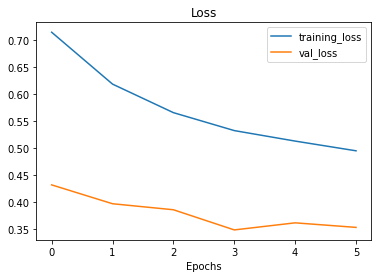

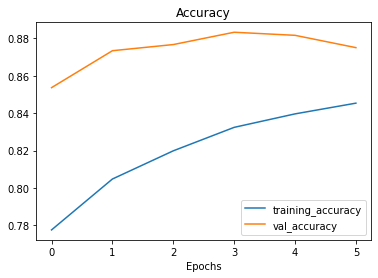

In [45]:
plot_loss_curves(history_4)

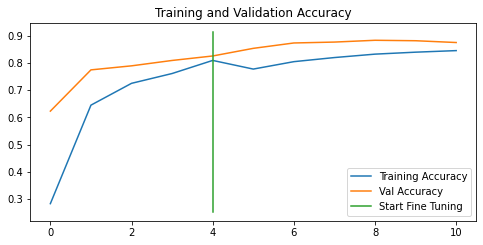

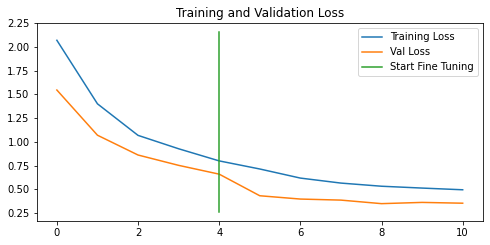

In [46]:
compare_historys(history_2, history_4)

In [ ]:
!tensorboard dev upload --logdir ./transfer_learning \
 --name 'Transfer Learning Experiments with 10 Food 101 Classes' \
 --description 'Transfer Learning Experiments' \
 --one_shot


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./transfer_learning

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) 

https://tensorboard.dev/experiment/Ue2wa4MzToql0evG9qk40g/


In [ ]:
y